<a href="https://colab.research.google.com/github/ailtiakova/pythonprojects/blob/master/KmeansCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Customer Segmentation using Machine Learning

The purpose of this exercise is to group customers, but rather than manually and arbitrarily naming and assigning customers to segments we are leaning on an unsupervised learning model to segment customers in the most meaningful way. Kmeans will group customers 

Dataset and method sourced from Kaggle: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [0]:
#import the libraries
import pandas as pd
import pandas.util.testing as tm
import numpy as np # linear algebra
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Visualisation

In [0]:
from google.colab import files
uploaded = files.upload()
# Tips for loading data into Colab: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
#Printing first 10 rows of the dataset
df2.head(10) 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [0]:
#total rows and colums in the dataset
df2.shape

(200, 5)

In [0]:
df2.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [0]:
#Missing values computation
df2.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

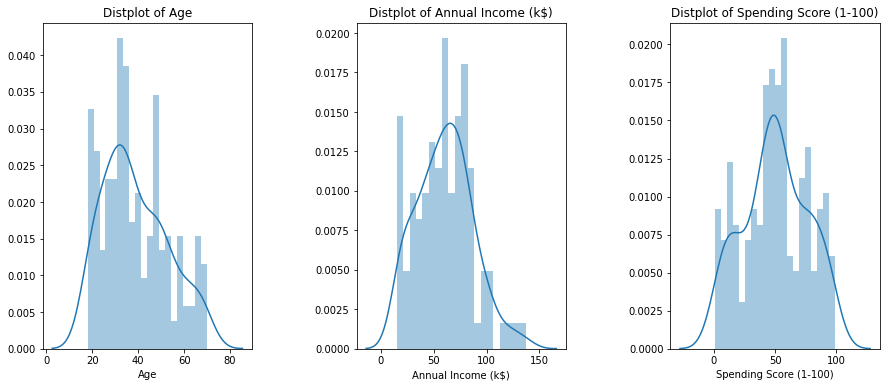

In [0]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df2[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [0]:
# testing retrieving rows and columns using iloc method
df2.iloc[4:5, [3,4]]

,Annual Income (k$),Spending Score (1-100)
4,17,40


In [0]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label, all rows. For future data set select your own features by modifying columns.
X= df2.iloc[:, [3,4]].values

In [0]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

In [0]:
#we assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

#loop function 
for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters
    #wcss means within-cluster sums of squares, and we are looking to minimising them to maximize the distance between clusters - more distinct groups.

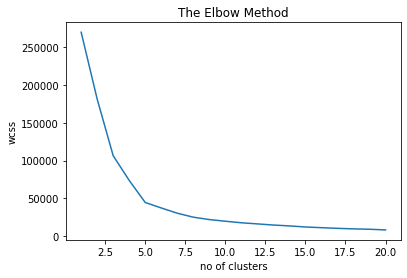

In [0]:
#Visualizing the ELBOW method to get the optimal value of K (optimal clusters)
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [0]:
#If you zoom out this curve then you will see that last elbow comes at k=5. I zoomed out to range(1,21) and I get a steep dip to 5, regardless of the higher range.
##Finally we got that k=5, aka the bend in the Elbox

In [0]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
#y_kmeans is the final model
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" whereas for supervised learning we use "fit_tranform()"


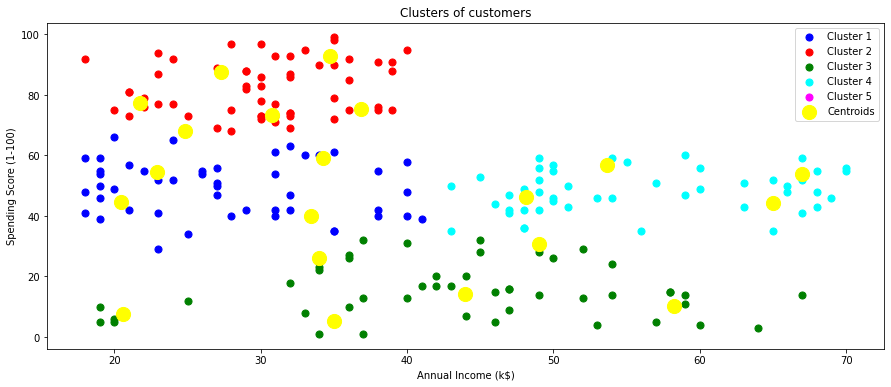

In [0]:
#Visualizing all the clusters 
plt.figure(1 , figsize = (15 ,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

##Round 1: Model Interpretation 

### * Cluster 3 (Green Color) is our Target Audience -> earning high and also spending high.

* Cluster 1 (Red Color) -> earning less but spending more
* Cluster 2 (Blue Color) -> average in terms of earning and spending 
* Cluster 4 (cyan Color) -> earning less, spending less
* Cluster 5 (magenta Color) -> Earning high , spending less

#Round 2: Comparing Age and spending score







In [0]:
### Feature selection for the model
#Amending to Age and Spending Score

X2= df2.iloc[:, [2,4]].values

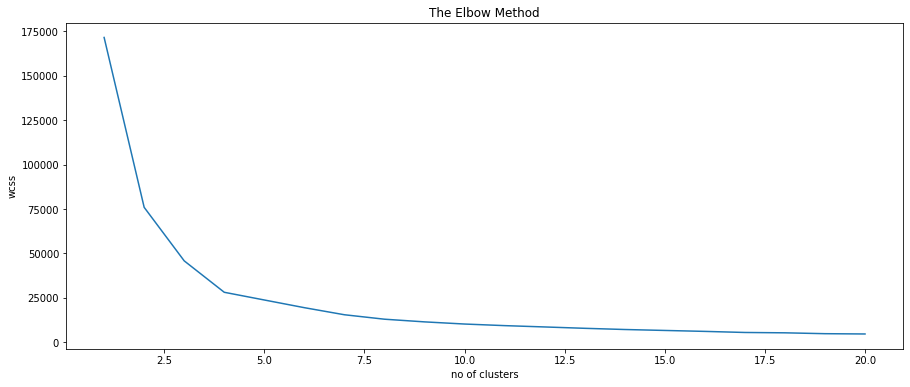

In [0]:
wcss2=[]

for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X2)
    wcss2.append(kmeans.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1,21), wcss2)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

#This time k = 4

In [0]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X2)

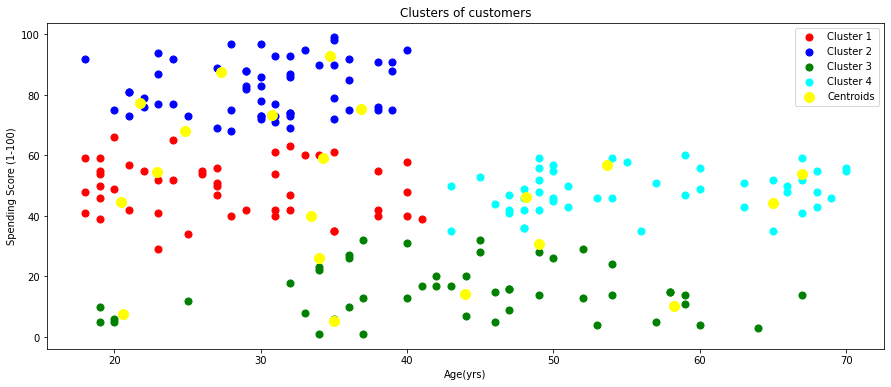

In [0]:
#Visualizing all the clusters 

plt.figure(1 , figsize = (15 ,6))
plt.scatter(X2[y_kmeans == 0, 0], X2[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans == 2, 0], X2[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y_kmeans == 3, 0], X2[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age(yrs)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

##Learnings

### * Cluster 2 (Blue) is our Target Audience -> there is a clear cluster of younger people who spend more, as opposed to the more conservative spenders spread across the older demographic.
